# Исследование объявлений о продаже игр

В данной работе в качестве исходного набора данных представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить в данных закономерности, которые влияют на успешность игры, чтобы потом спрогнозировать потенциально популярные продукты и спланировать рекламные компании.

## Изучим файл с данными.

### Импортируем необходимые библиотеки, а также считаем данные из файла games.csv в переменную data.

#### Импортируем необходимые библиотеки в отдельной ячейке, чтобы потом не перезаписывать переменные в случае изменения списка библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Выведем основную информацию о датафрейме на экран

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB

None


In [4]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Построим гистограммы для всех возможных столбцов, чтобы увидеть распределение значений

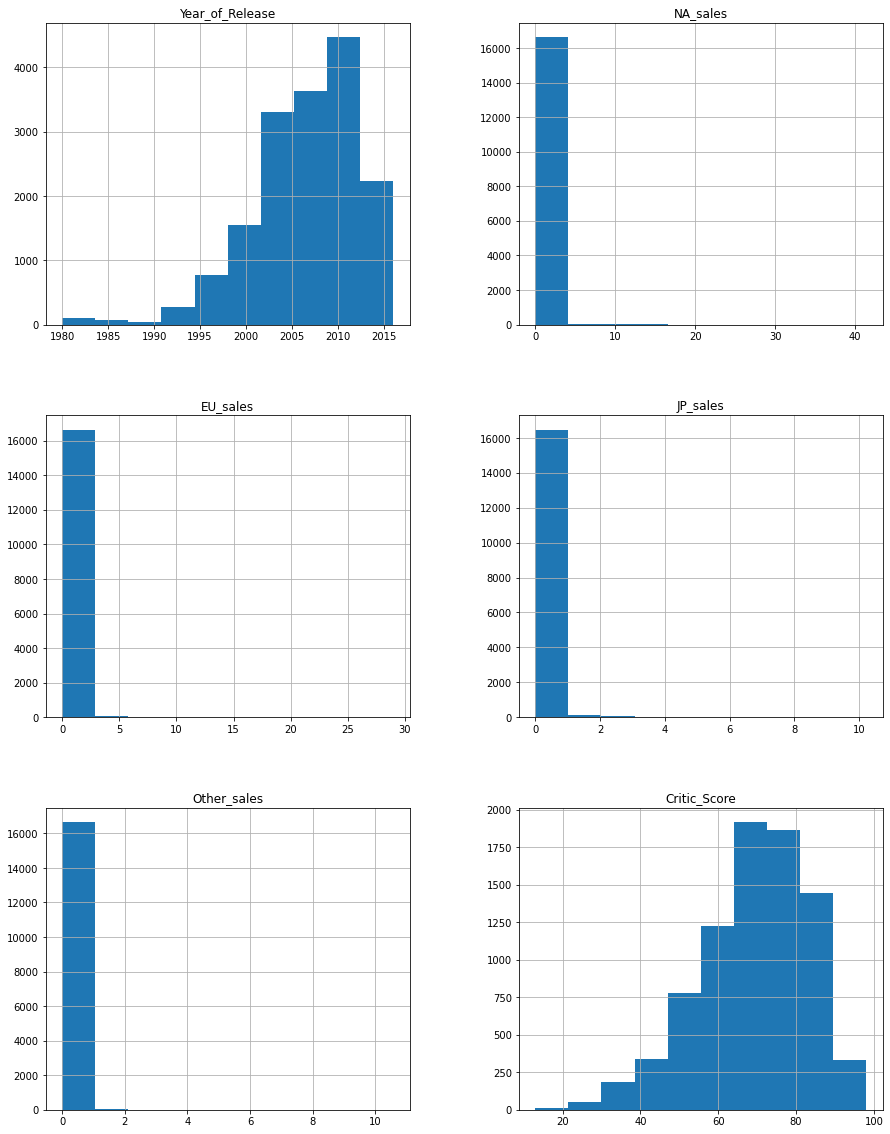

In [5]:
data.hist(figsize=(15,20))
plt.show()

#### Вывод:

Исходя из полученный информации видим, что мы имеем пропущенные данные в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Бросающихся в глаза аномальных значений на первый взгляд нет, однако есть неправильный тип данных в столбцах Year_of_Release, User_Score. 

## Предобработка данных

### Приведем названия стобцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

### Приведет типы данных в каждом столбце

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64') #год выпуска явно должен быть целым

В столбце user_score хранятся также значения tbd, которые означают, что оценка еще не выставлена в связи с малым количеством продаж, поэтому тип данного столбца заменим позже.

### Добавим столбец с суммой количества проданных копий

In [8]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Выведем количество дубликатов

In [9]:
print(data.duplicated().sum())

0


Явных дубликатов нет.

### Выведем количество пропущенных значений для каждого столбца

In [10]:
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
sum_sales             0
dtype: int64

### Обработаем пропущенные значения

#### Перейдем к обработке пропущенных значений в каждом столбце

Имя игры особой роли не играет, поэтому можем просто написать назвать их unknowngame1 и unknowngame2. Пропажу подобного значения можно объяснить техническим сбоем, так как название явно должно быть у каждой  игры.

In [11]:
data['name'] = data['name'].fillna('unknowngame1', limit=1)
data['name'] = data['name'].fillna('unknowngame2')
print(data['name'].isna().sum())

0


Можем заменить пропущенные значения года выпуска на значения года выпуска той же игры для другой платформы при наличии, остальные же значения отбросим.

In [12]:
def get_year_mode(row):
    mode = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['year_of_release'].isnull() == False)
    ]['year_of_release'].mode()
    
    if len(mode) == 0:
        return np.NaN
    
    return mode[0]

In [13]:
data.loc[data['year_of_release'].isnull(), 'year_of_release'] = data[data['year_of_release'].isnull()].apply(get_year_mode, axis=1)
print(data['year_of_release'].isna().sum())

146


In [14]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Отбросим значения с отсутствующим жанром. Относительно же причины отсутствующих значений - ситуация аналогична с названием игры.

In [15]:
data = data.dropna(subset=['genre']).reset_index(drop=True)
print(data['genre'].isna().sum())

0


Оценки критиков обычно появляются до оценок игроков. Поэтому в теории оно не должно быть связано даже с количеством проданных копий, но попытаемся проверить эту корреляцию. Относительно же причины отсутствующих значений - в части случаев это может быть сбой, а в других же игра просто не дошла до критиков.

In [16]:
print(data['sum_sales'].corr(data['critic_score']))

0.24523792170687722


Как и предполагали. Оценка критиков к числу проданных копий имеет очень низкую линейную корреляцию.

Попробуем взглянуть на несколько строчек с пропущенной оценкой критиков.

In [17]:
display(data[data['critic_score'].isnull()].sort_values(by=['sum_sales'], ascending=False))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16086,Dr. Slump & Arale-Chan,DS,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16088,Umineko no Naku Koro ni Portable 1,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16566,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16561,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


Из данных видим, что пропускаются эти значения, как в старых играх, так и в новых. На разных платформах. В разное время. С разным количеством продаж.

Попробуем в части случаев заменить пропущенные оценки критиков на среднее для данной игры, но по разным платформам.

In [18]:
def get_critic_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['critic_score'].isnull() == False)
    ]['critic_score'].median()
data.loc[data['critic_score'].isnull(), 'critic_score'] = data[data['critic_score'].isnull()].apply(get_critic_mean, axis=1)

print(data['critic_score'].isna().sum())

7532


Поступим также для оценок пользователей

In [19]:
def get_user_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['user_score'].isnull() == False) &
        (data['user_score'] != 'tbd')
    ]['user_score'].median()
data.loc[(data['user_score'].isnull()) & (data['user_score'] != 'tbd'), 'user_score'] = data.loc[(data['user_score'].isnull()) & (data['user_score'] != 'tbd')].apply(get_user_mean, axis=1)

print(data['user_score'].isna().sum())

6282


Пропущенных значений в этих столбцах все также много, однако более заменять их мы не можем, потому что адекватных зависимостей быть не может. Теперь можем поменять значения tbd в стобце user_score на Nan.

In [20]:
data['user_score'].replace('tbd', np.NaN, inplace=True)
data['user_score'] = data['user_score'].astype('float')

Обработаем пропущенные значения в столбце Rating.

Для начала взглянем на сами значения.

In [21]:
print(data['rating'].value_counts())

E       3958

T       2930

M       1554

E10+    1412

EC         8

K-A        3

RP         2

AO         1

Name: rating, dtype: int64


Обработаем пропущенные значения по аналогии с critic_score и user_score

In [22]:
def get_rating_mode(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['rating'].isnull() == False)
    ]['rating'].mode()
    
data.loc[data['rating'].isnull(), 'rating'] = data[data['rating'].isnull()].apply(get_rating_mode, axis=1)

print(data['rating'].isna().sum())

6699


Поставим заглушку на оставшиеся значения.

In [23]:
data['rating'] = data['rating'].fillna('Unknown')

### Обработаем неявные дубликаты

Можно усиленно просматривать все имена на предмет скобок, однако не всегда даже разные версии игры выходят выходят в одно время и являются дублями, поэтому не будем обрабатывать данный столбец, а перейдем сразу к платформе.

In [24]:
print(data['platform'].value_counts())

PS2     2140

DS      2129

PS3     1320

Wii     1301

X360    1250

PSP     1203

PS      1190

PC       970

XB       817

GBA      813

GC       552

3DS      515

PSV      429

PS4      392

N64      318

XOne     247

SNES     239

SAT      173

WiiU     147

2600     117

NES       98

GB        97

DC        52

GEN       27

NG        12

SCD        6

WS         6

3DO        3

TG16       2

GG         1

PCFX       1

Name: platform, dtype: int64


Видимых дубликатов нет.

Перейдем к платформе

In [25]:
print(data['platform'].value_counts())

PS2     2140

DS      2129

PS3     1320

Wii     1301

X360    1250

PSP     1203

PS      1190

PC       970

XB       817

GBA      813

GC       552

3DS      515

PSV      429

PS4      392

N64      318

XOne     247

SNES     239

SAT      173

WiiU     147

2600     117

NES       98

GB        97

DC        52

GEN       27

NG        12

SCD        6

WS         6

3DO        3

TG16       2

GG         1

PCFX       1

Name: platform, dtype: int64


Видимых дубликатов нет

Перейдем к жанру

In [26]:
print(data['genre'].value_counts())

Action          3342

Sports          2333

Misc            1735

Role-Playing    1484

Shooter         1311

Adventure       1294

Racing          1236

Platform         879

Simulation       860

Fighting         842

Strategy         678

Puzzle           573

Name: genre, dtype: int64


Видимых дубликатов нет

Перейдем к рейтингу

In [27]:
print(data['rating'].value_counts())

Unknown    6699

E          3958

T          2930

M          1554

E10+       1412

EC            8

K-A           3

RP            2

AO            1

Name: rating, dtype: int64


Видимых дубликатов нет

### Обработаем аномальные значения

Для начала стоит взглянуть на описание данных.

In [28]:
display(data.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,9035.000000,7891.000000,16567.000000
mean,2006.490252,0.263975,0.145814,0.078020,0.047567,68.806696,7.134051,0.535376
std,5.863266,0.816474,0.505364,0.310068,0.187476,14.112809,1.494472,1.554281
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Каких-либо явных проблем нет, взглянем на распределения

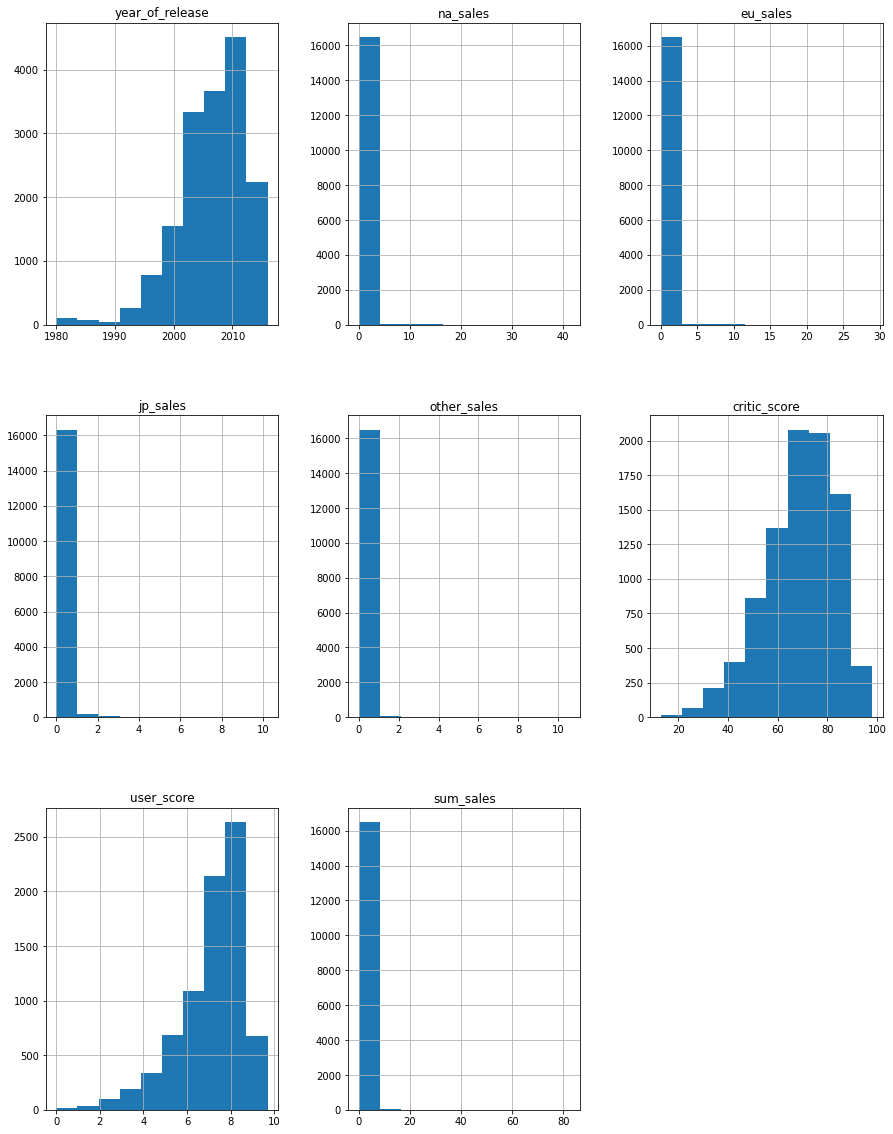

In [29]:
data.hist(figsize=(15,20))
plt.show()

На всякий случай более подробно рассмотрим na_sales, eu_sales, jp_sales, other_sales

<AxesSubplot:ylabel='Frequency'>

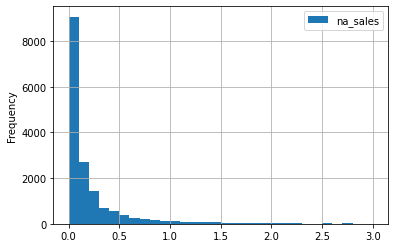

In [30]:
data.plot(y='na_sales', kind='hist', bins=30, grid=True, range=(0,3))

<AxesSubplot:ylabel='Frequency'>

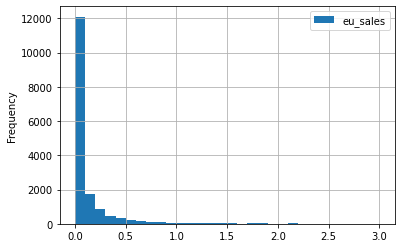

In [31]:
data.plot(y='eu_sales', kind='hist', bins=30, grid=True, range=(0,3))

<AxesSubplot:ylabel='Frequency'>

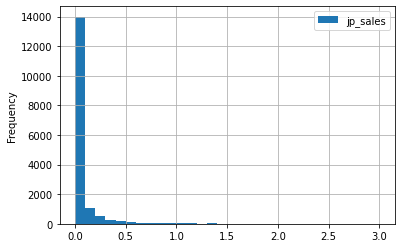

In [32]:
data.plot(y='jp_sales', kind='hist', bins=30, grid=True, range=(0,3))

<AxesSubplot:ylabel='Frequency'>

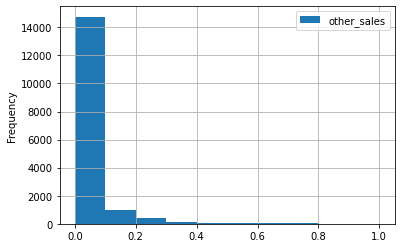

In [33]:
data.plot(y='other_sales', kind='hist', bins=10, grid=True, range=(0,1))

Ничего критичного не вижу.

### Вывод

На этом предобработка данных закончена.
- Были приведены названия столбцов к нижнему регистру.
- Были заполнены пропуски в столбцах name, year_of_release
- Были отброшены строки с отсутствующими значениями в столбце genre
- Был добавлен столбец sum_sales
- Были частично обработаны значения в столбцах user_score, critic_score, rating

## Исследовательский анализ данных

### Проанлизируем сколько игр выпускалось в каждый год

Text(0.5, 1.0, 'Сводная статистика по количеству выпущенных игр за каждый год')

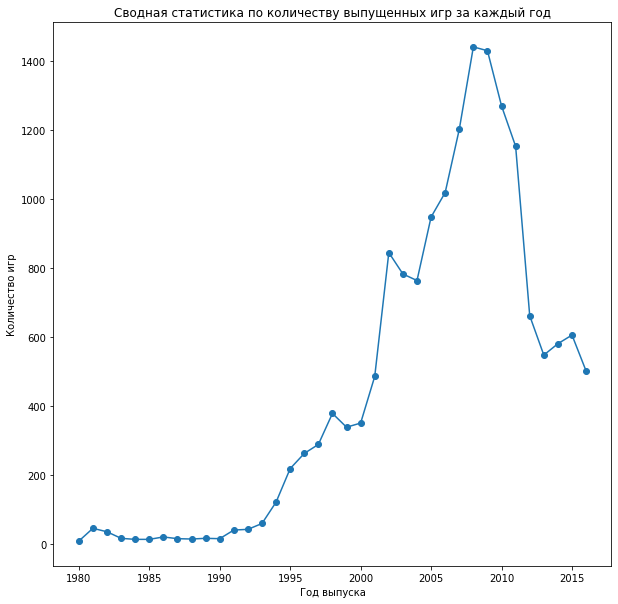

In [34]:
data.groupby('year_of_release')['name'].count().plot(style='o-', figsize=(10,10))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Сводная статистика по количеству выпущенных игр за каждый год')

Можем понять, что нас не особо могут интересовать годы с 1980 по приблизтельно 2000.

### Посмотрим как менялись продажи игр в зависимости от платформы

<AxesSubplot:xlabel='platform'>

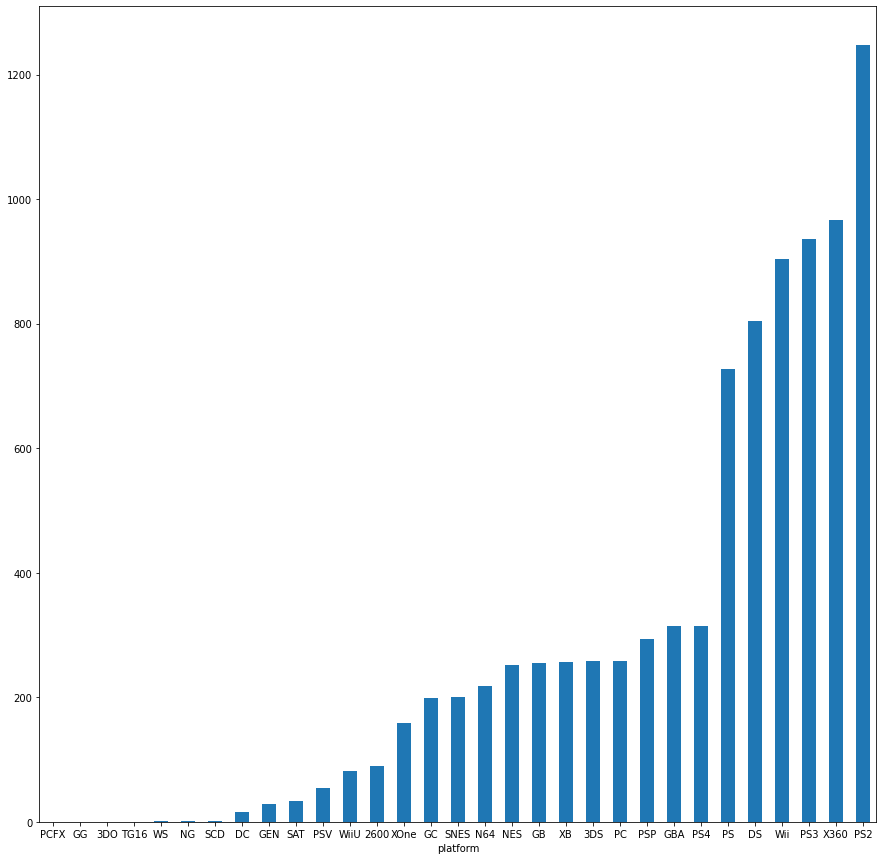

In [35]:
sales_platform = data.groupby('platform')['sum_sales'].sum()
sales_platform.sort_values().plot.bar(rot=0, figsize=(15,15))

Возьмем первые характерные 6 платформ - PS, DS, Wii, PS3, X360, PS2

In [36]:
list_biggest_platforms = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

Теперь посмотрим распределение по годам для этих платформ

Text(8.91122106481481, 0.5, 'Продажи (млн $)')

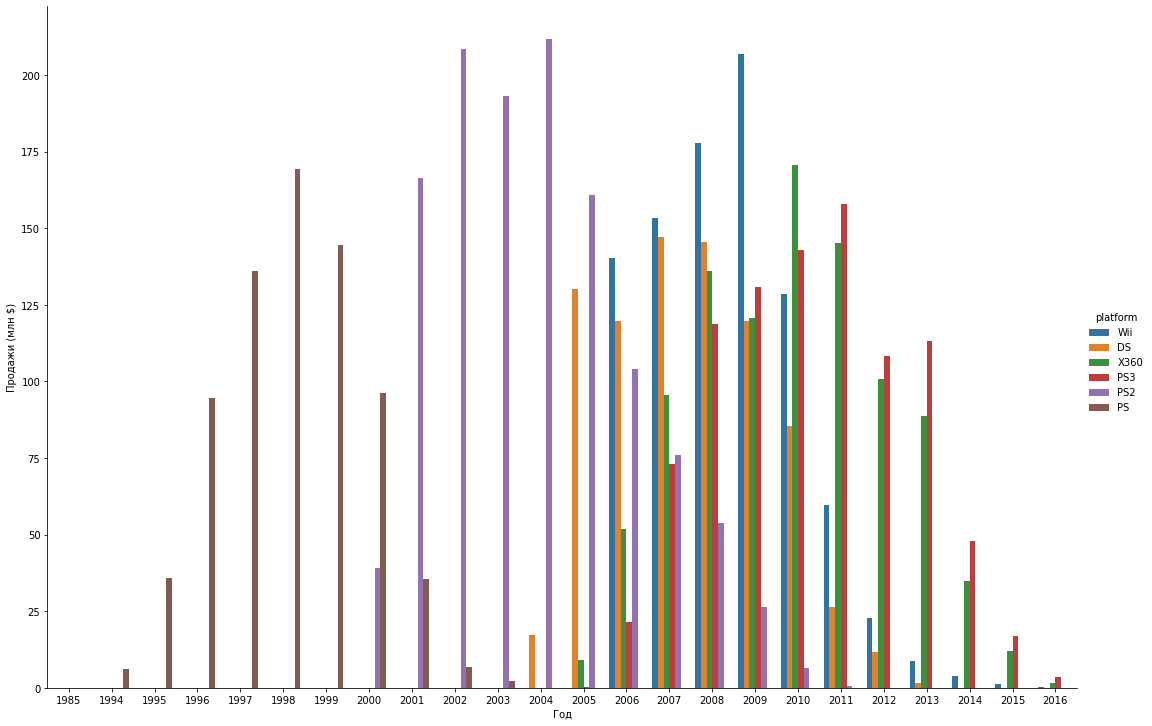

In [37]:
sns.catplot(
    kind='bar',
    data=data.query('platform in @list_biggest_platforms'),
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=10,
    aspect=1.5,
    ci=None,
    estimator=sum
)
plt.xlabel('Год')
plt.ylabel('Продажи (млн $)')

Из графика видим, что на пике платформы находятся в среднем не более 6 лет.

### Возьмем данные за актуальный период

In [38]:
actual_data = data.query('year_of_release >= 2014')

### Проанализируем падение и рост платформ за актуальный период

Text(8.92962962962963, 0.5, 'Продажи (млн $)')

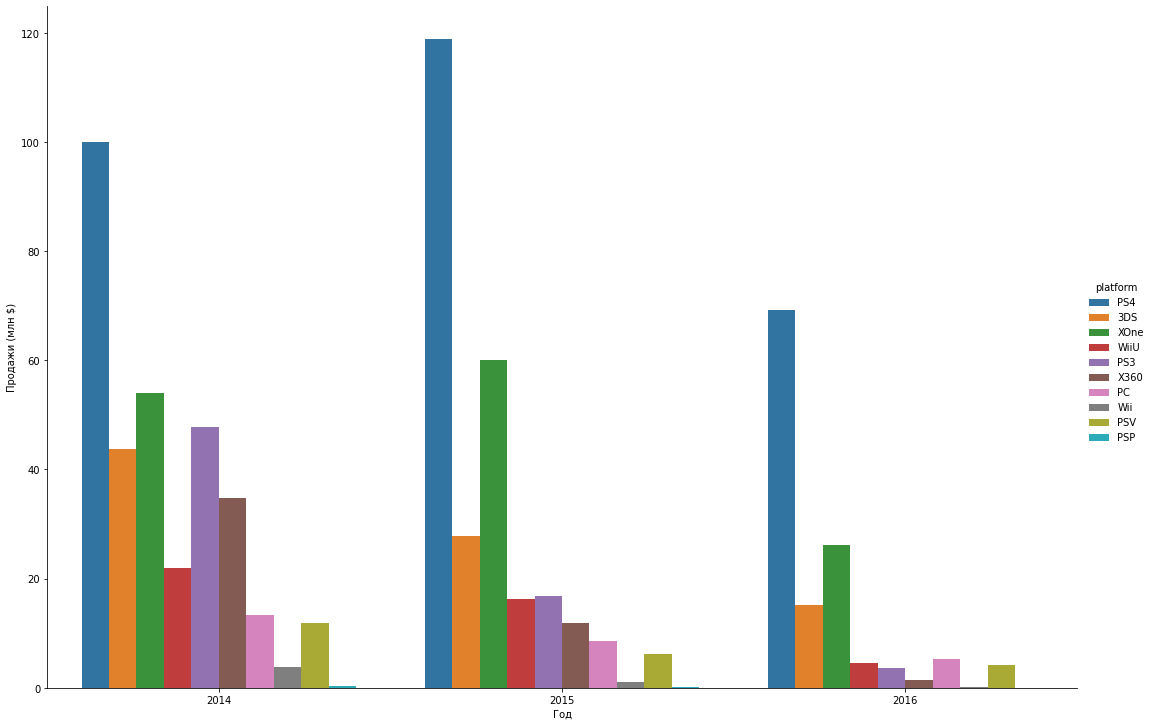

In [39]:
sns.catplot(
    kind='bar',
    data=actual_data,
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=10,
    aspect=1.5,
    ci=None,
    estimator=sum
)
plt.xlabel('Год')
plt.ylabel('Продажи (млн $)')

Можем отметить внушительную популярность платформы PS4, которая однака к 2016 году ощутима спадает, однако все же остается наиболее привелкательной для новой игры. Также на спад идет и платформа XOne, пиковое значение которой, судя по всему было в 2015, но стоит учесть, что это втора по популярности платформа. Также сразу замечаем видимое падение платформы 3DS, на которой уже явно не стоит выпускать игру.

### Постройм график «ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

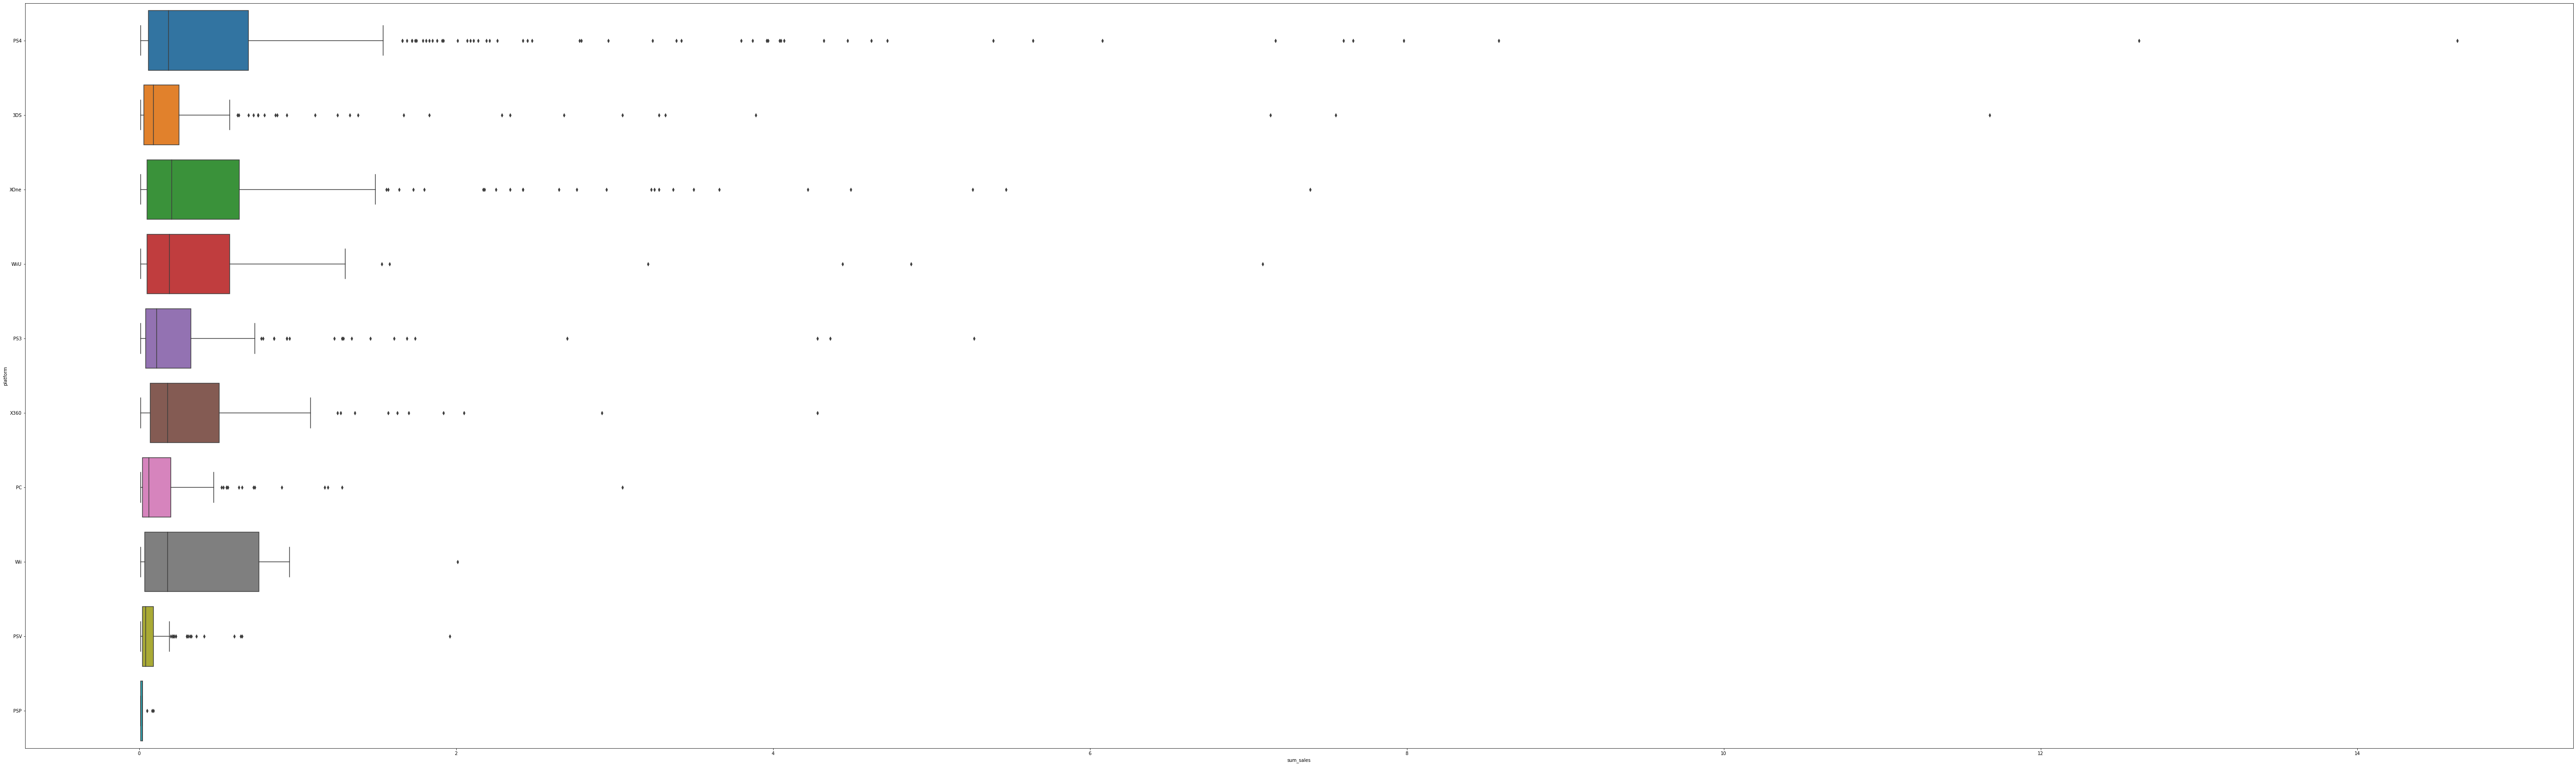

In [40]:
plt.figure(figsize=(100,30))
sns.boxplot(y='platform', x='sum_sales', data=actual_data)


Для более видимых графиков поделим наши данные пополам

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

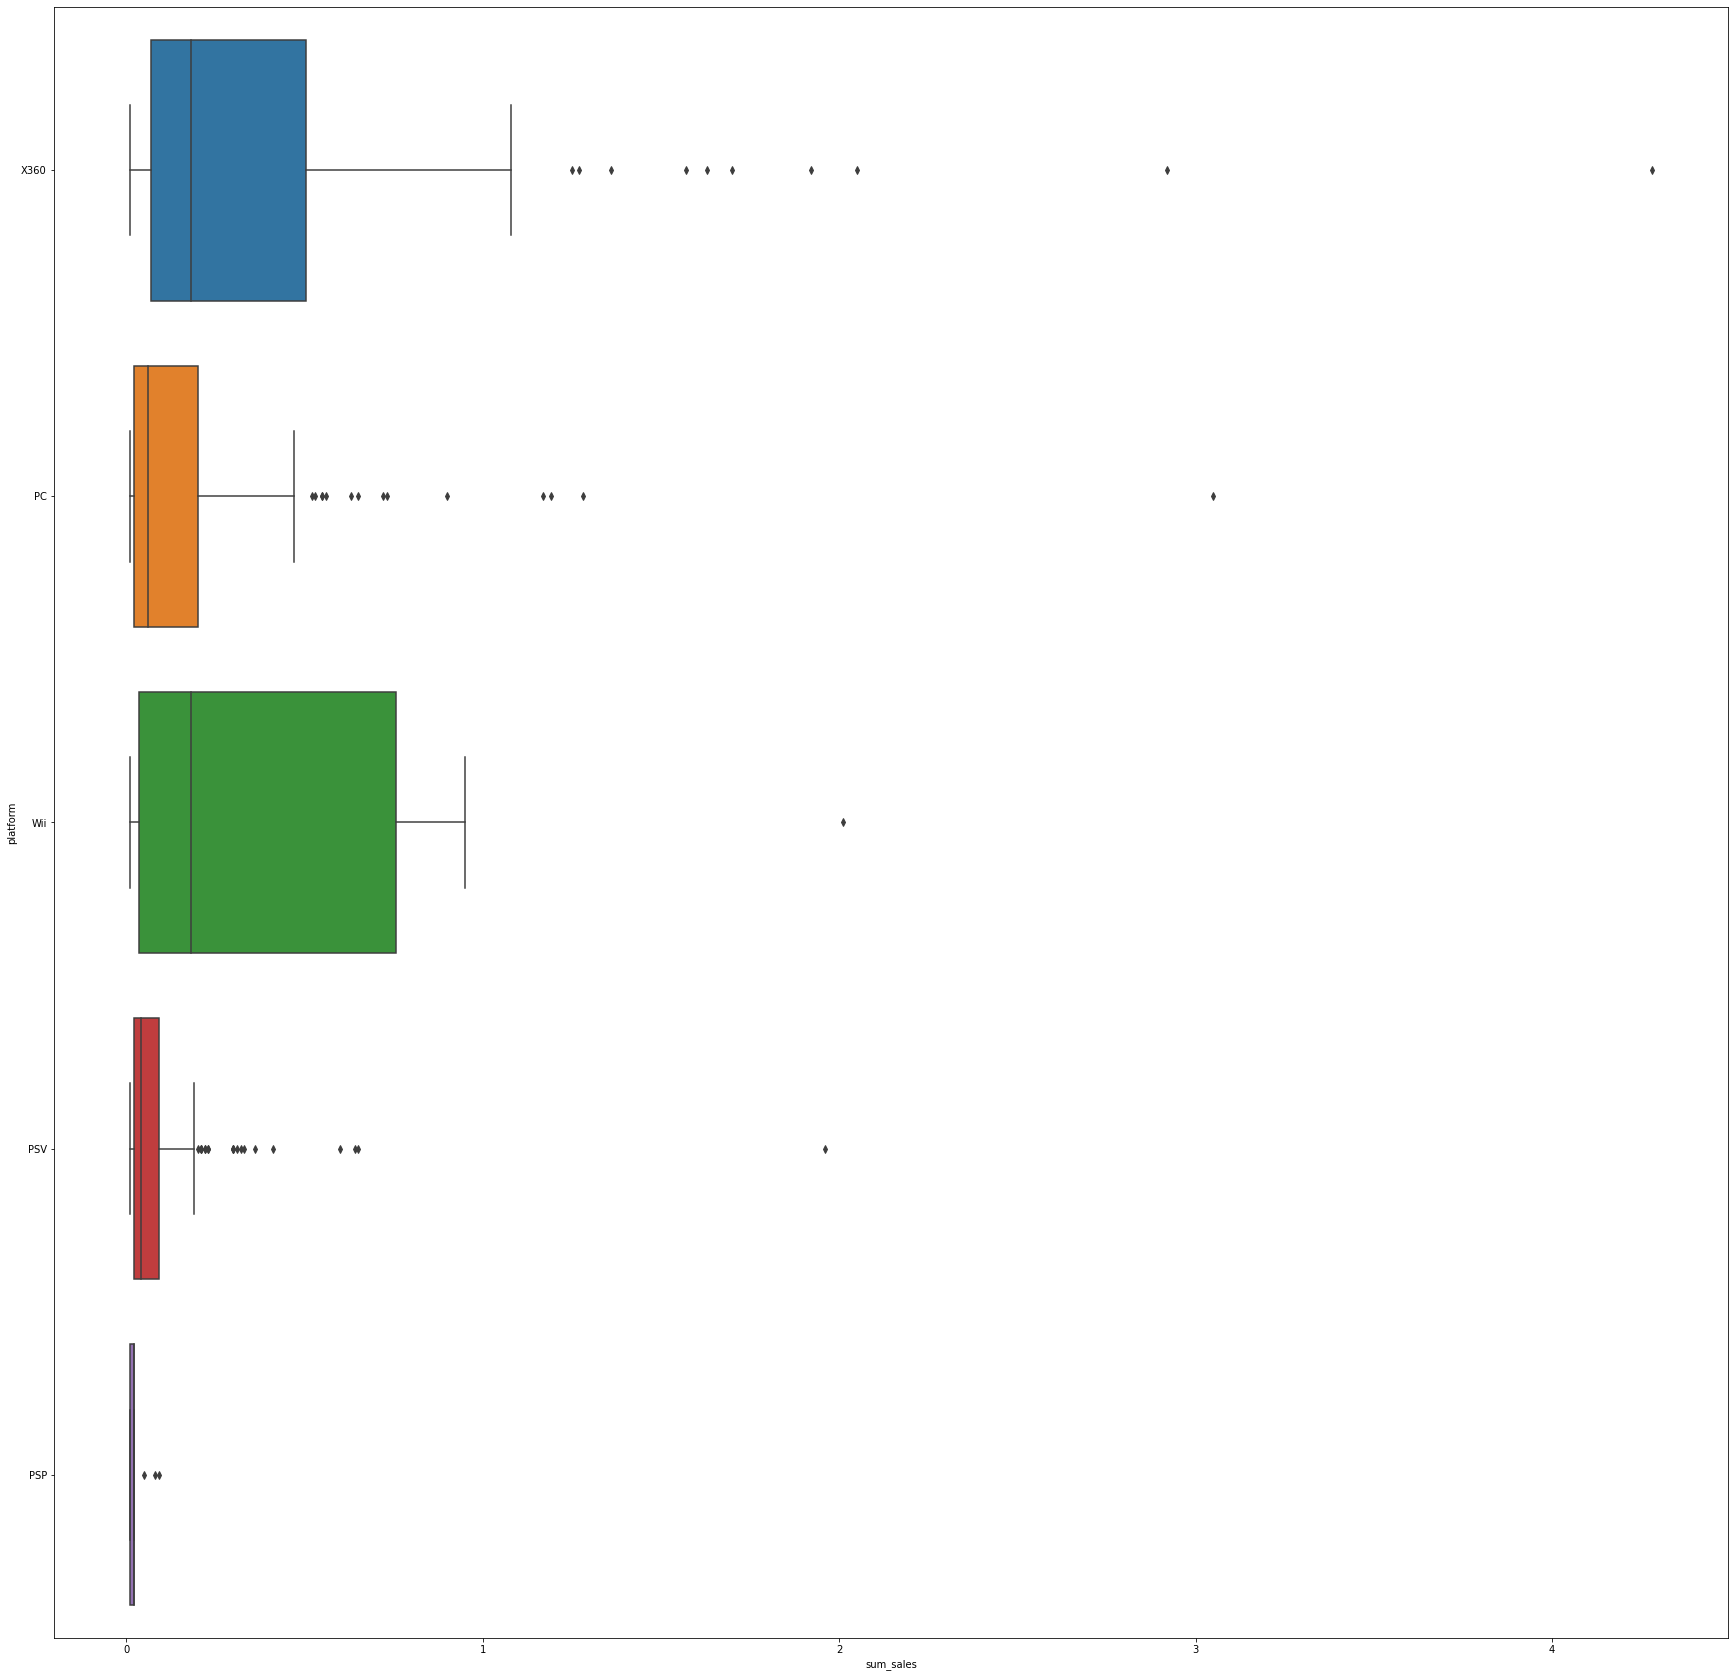

In [41]:
plt.figure(figsize=(30,30))
sns.boxplot(y='platform', x='sum_sales', data=actual_data.query('platform=="PSP" or platform=="PSV" or platform=="Wii" or platform == "PC" or platform == "X360"'))

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

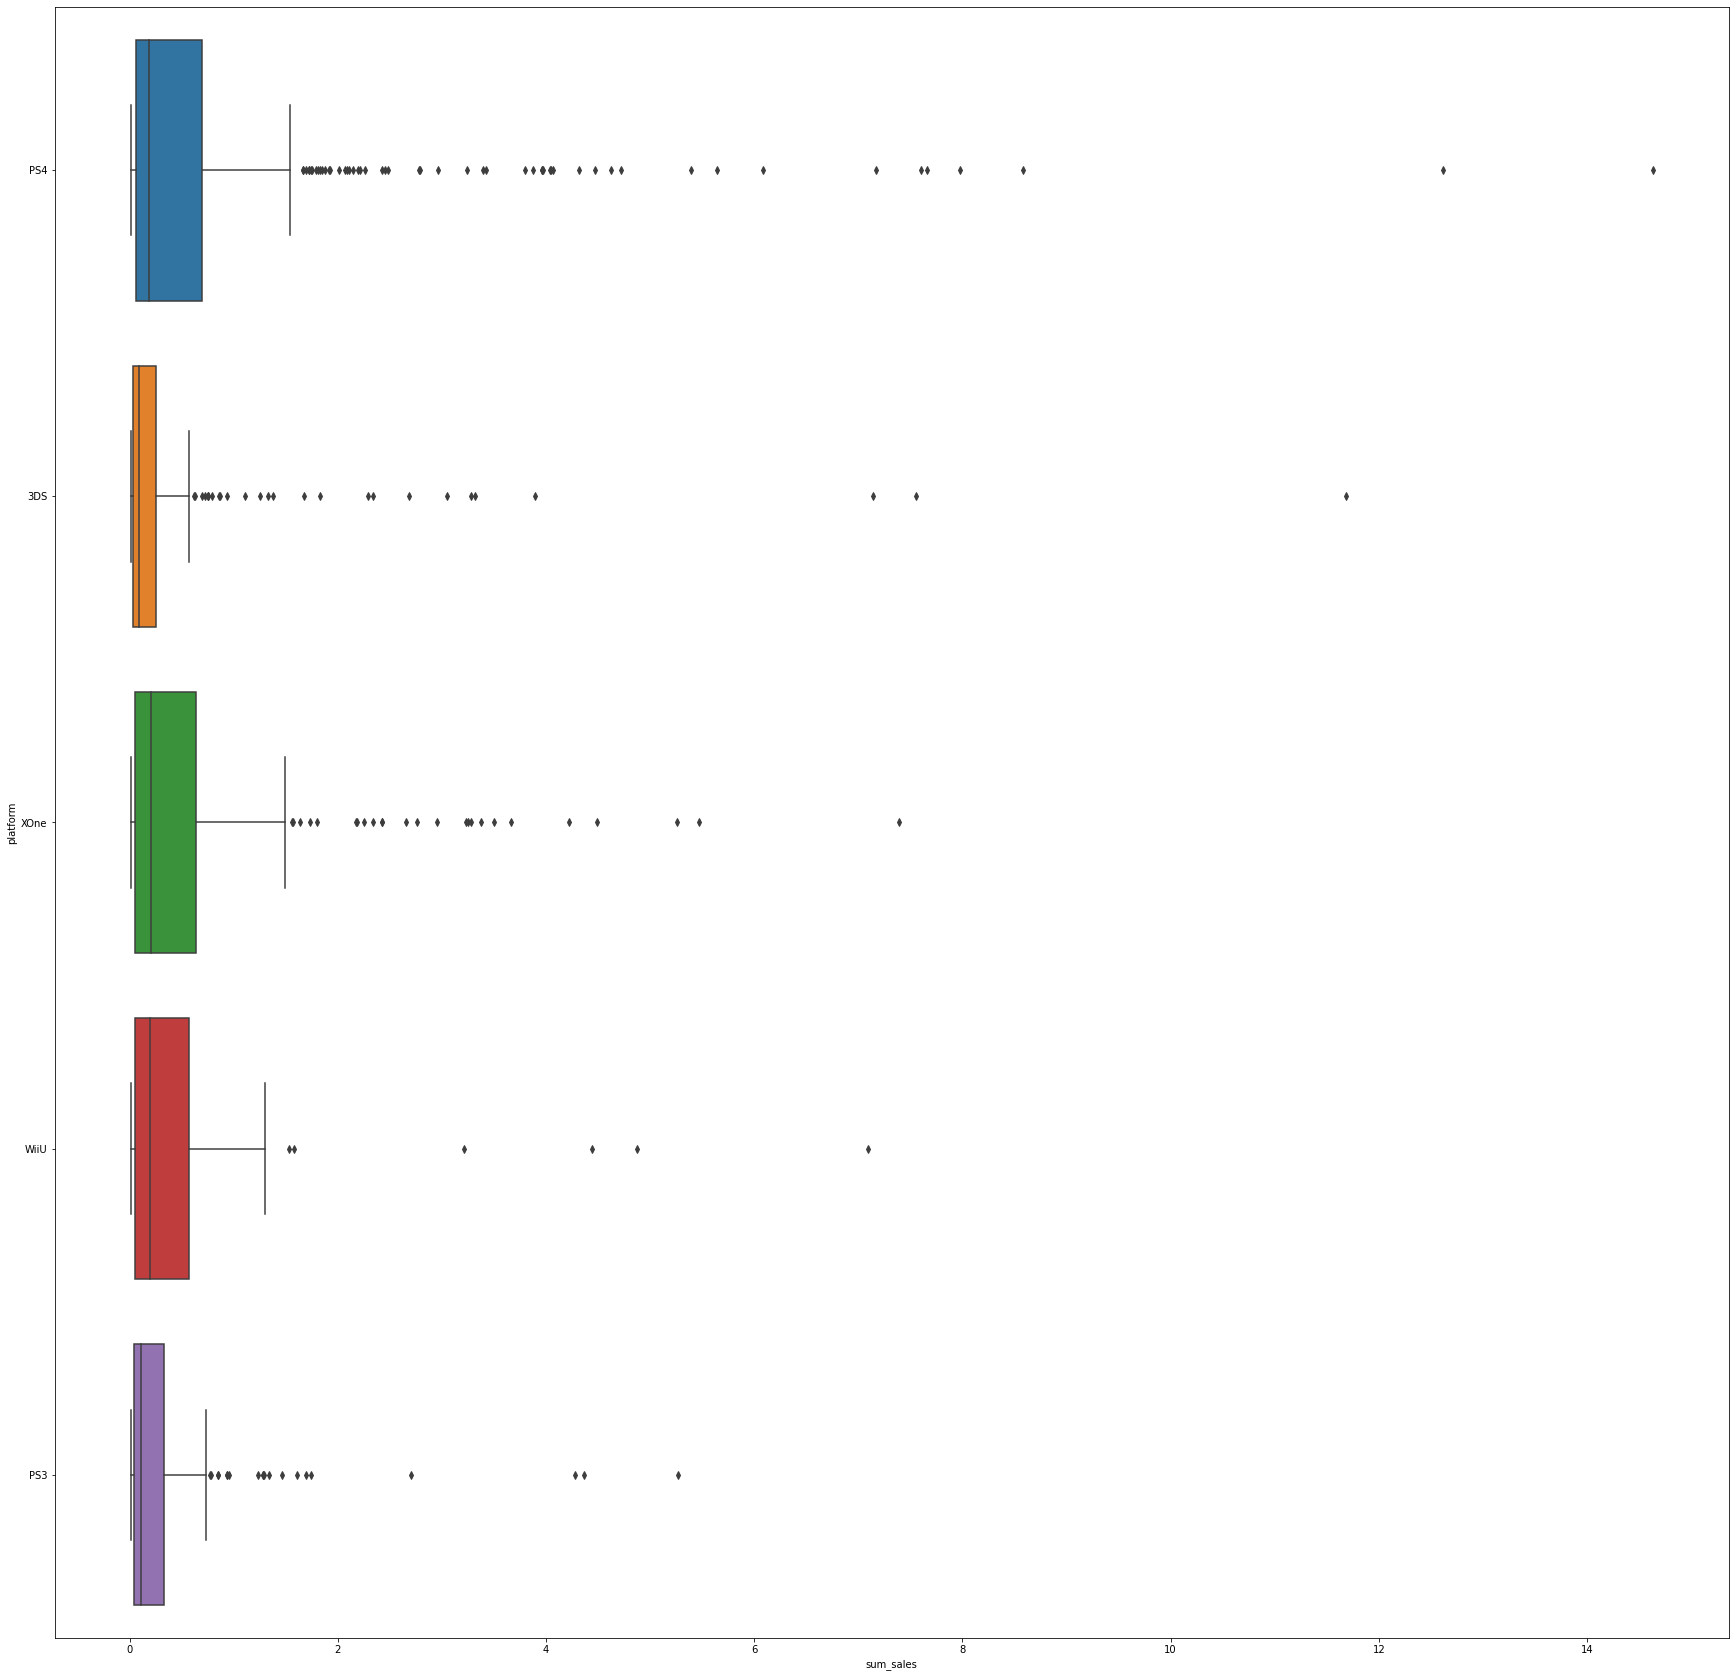

In [42]:
plt.figure(figsize=(30,30))
sns.boxplot(y='platform', x='sum_sales', data=actual_data.query('platform=="PS3" or platform=="WiiU" or platform == "XOne" or platform == "3DS" or platform == "PS4"'))

Видим, что весьма типично и ожидаемо большое количество выбросов, так как игры все-таки бывают разные и часть продается просто великолепно, а часть не продается вовсе.

### Оценим влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

В качестве популярной платформы возьмем PS4, так как она является более того и перспективной для выпуска игра в следующем году.

In [43]:
data_ps4 = actual_data.query('platform == "PS4"')

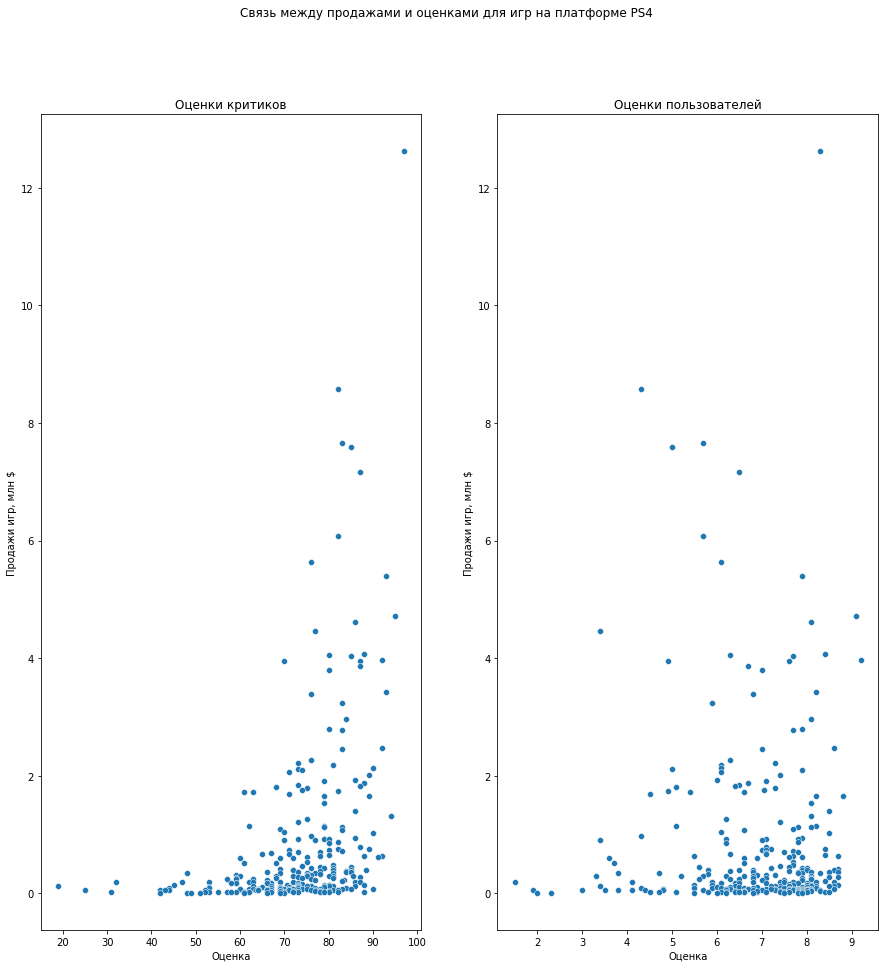

In [44]:
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_ps4, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_ps4, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе PS4')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

Взглянем на показатели корреляции.

In [45]:
print(data_ps4['sum_sales'].corr(data_ps4['user_score']))
print(data_ps4['sum_sales'].corr(data_ps4['critic_score']))

-0.02343089074673951

0.3880108685763901


Видим, что корреляция между оценками пользователей и количеством продаж весьма маленькая, однако же корреляция между оценками критиков и количеством продаж в разы сильнее.

Возьмем и проделаем ту же самую работу, однако для платформы X360.

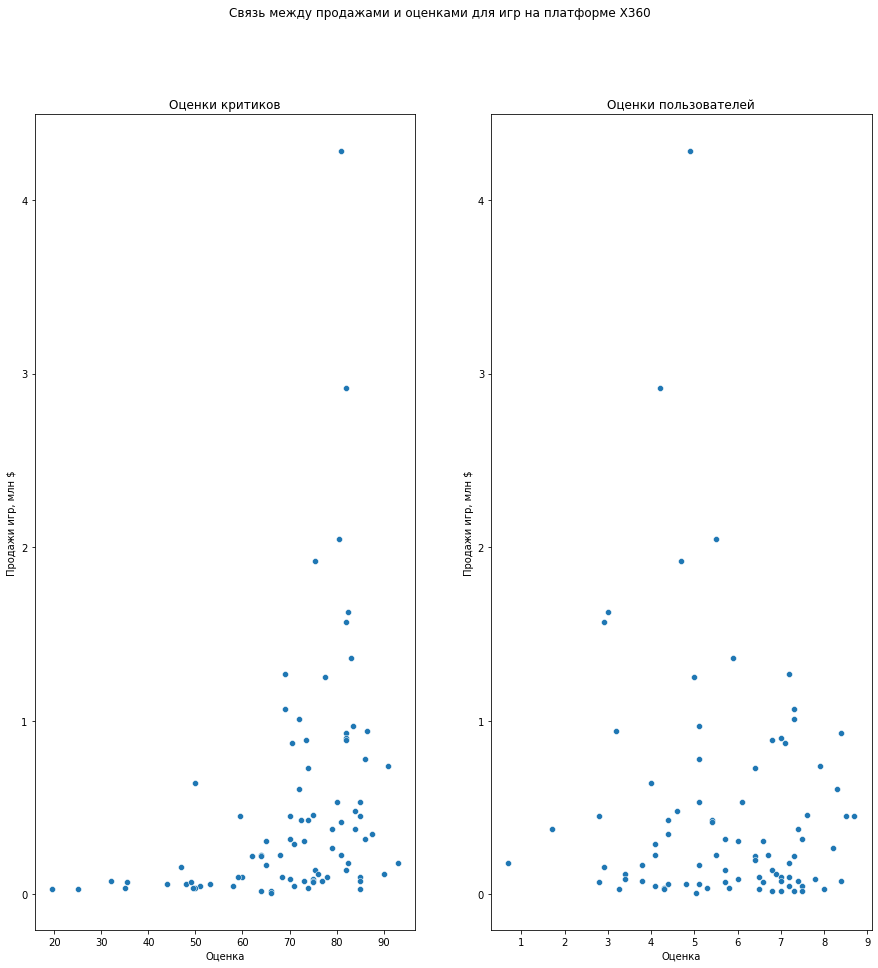

-0.11227326669327088

0.3340836504667745


In [46]:
data_x360 = actual_data.query('platform == "X360"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе X360')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

Ситуация практически такая же.

Рассмотрим ситуации с остальными платформами

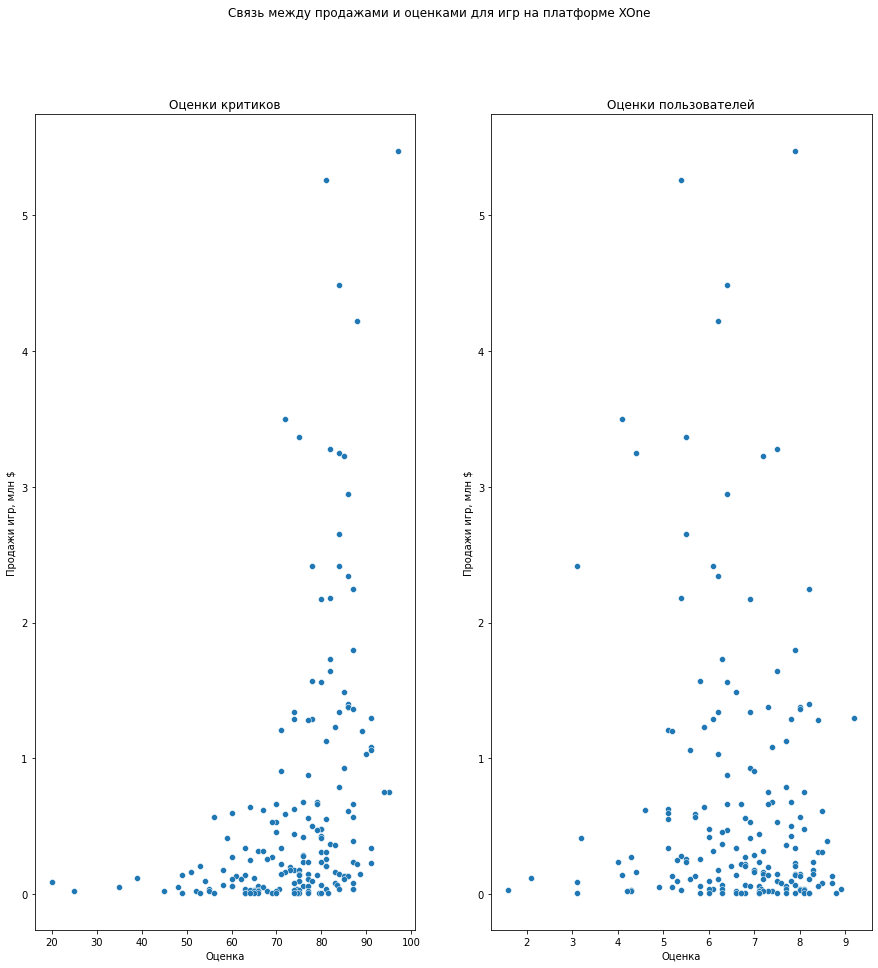

-0.09103809159462042

0.379818443623408


In [47]:
data_x360 = actual_data.query('platform == "XOne"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе XOne')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

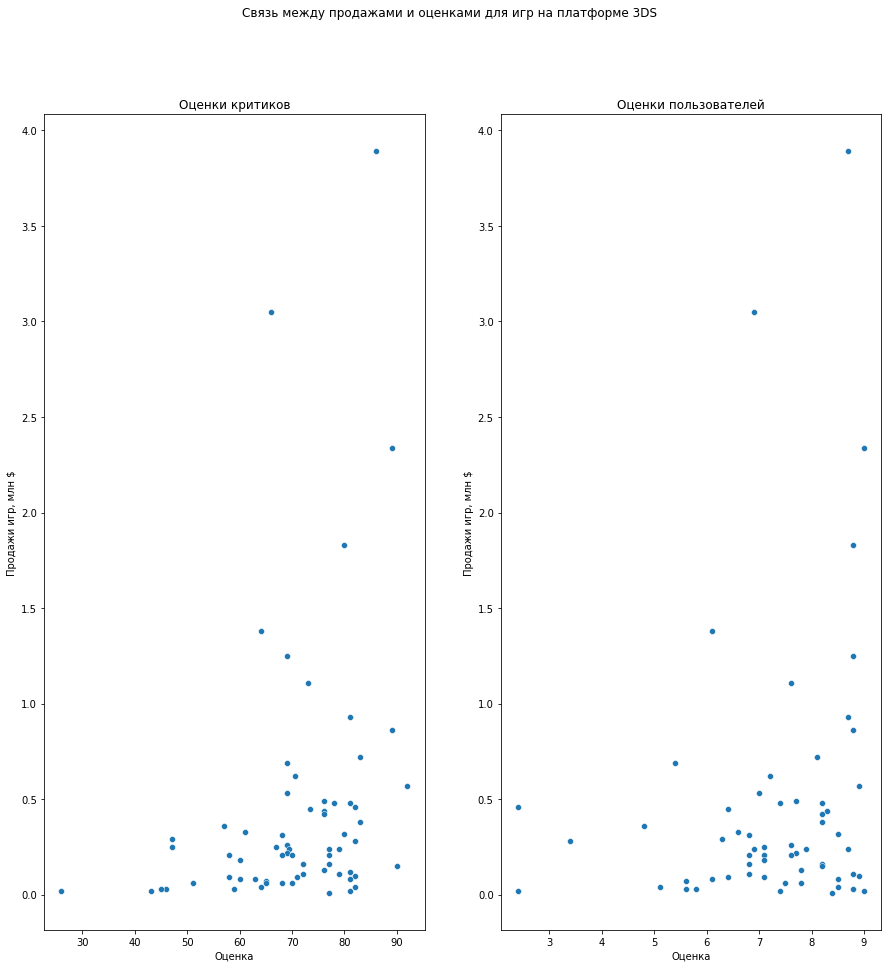

0.19612076528970626

0.27926639498833616


In [48]:
data_x360 = actual_data.query('platform == "3DS"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе 3DS')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

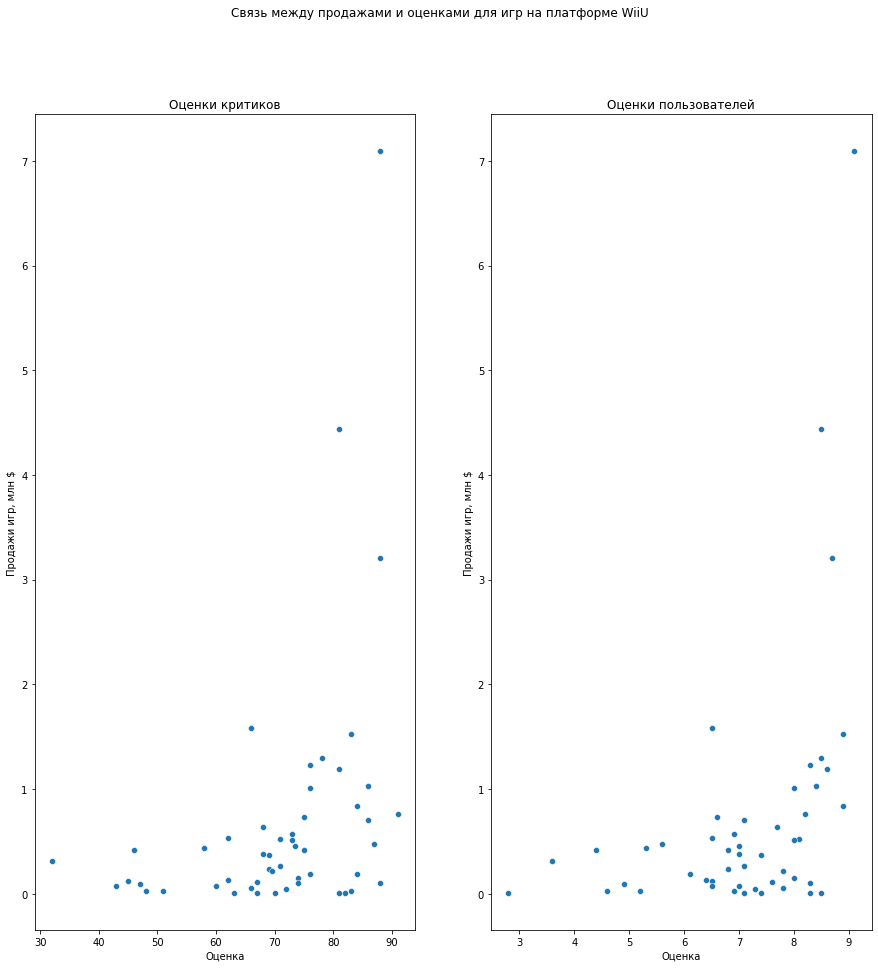

0.4049118985601792

0.36642502414423156


In [49]:
data_x360 = actual_data.query('platform == "WiiU"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе WiiU')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

Здесь оценки пользователей имеют большее влияние.

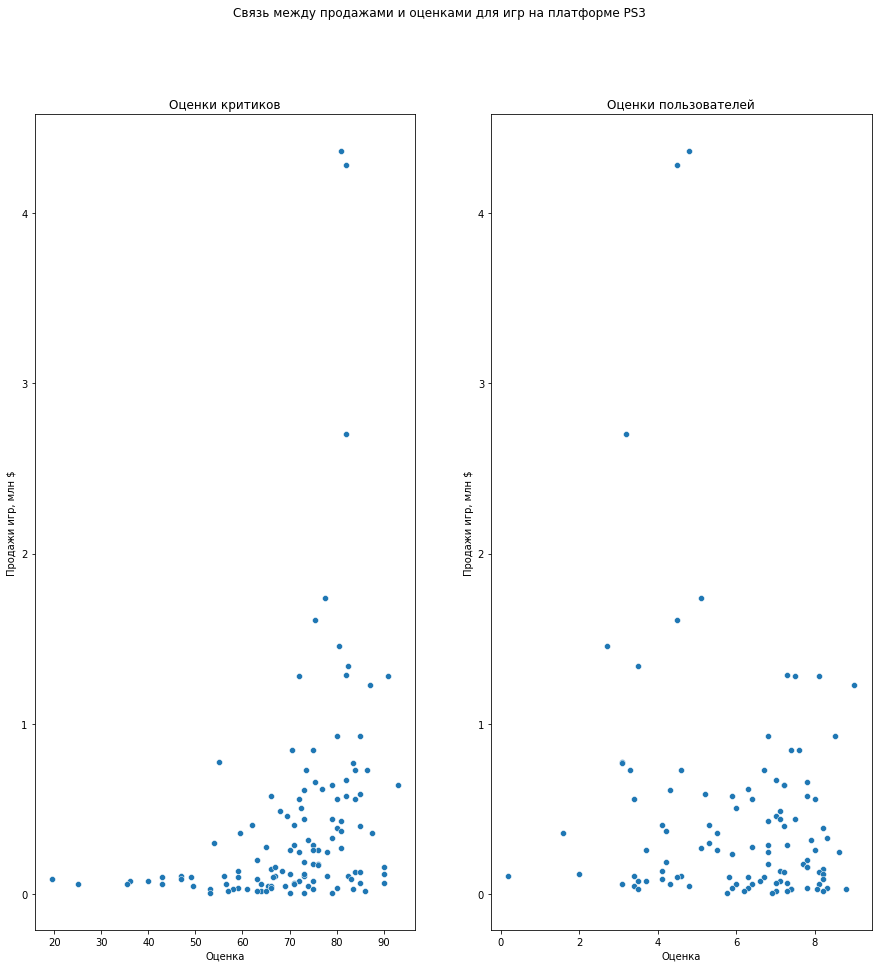

-0.1565904225201322

0.31807909205956925


In [50]:
data_x360 = actual_data.query('platform == "PS3"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе PS3')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

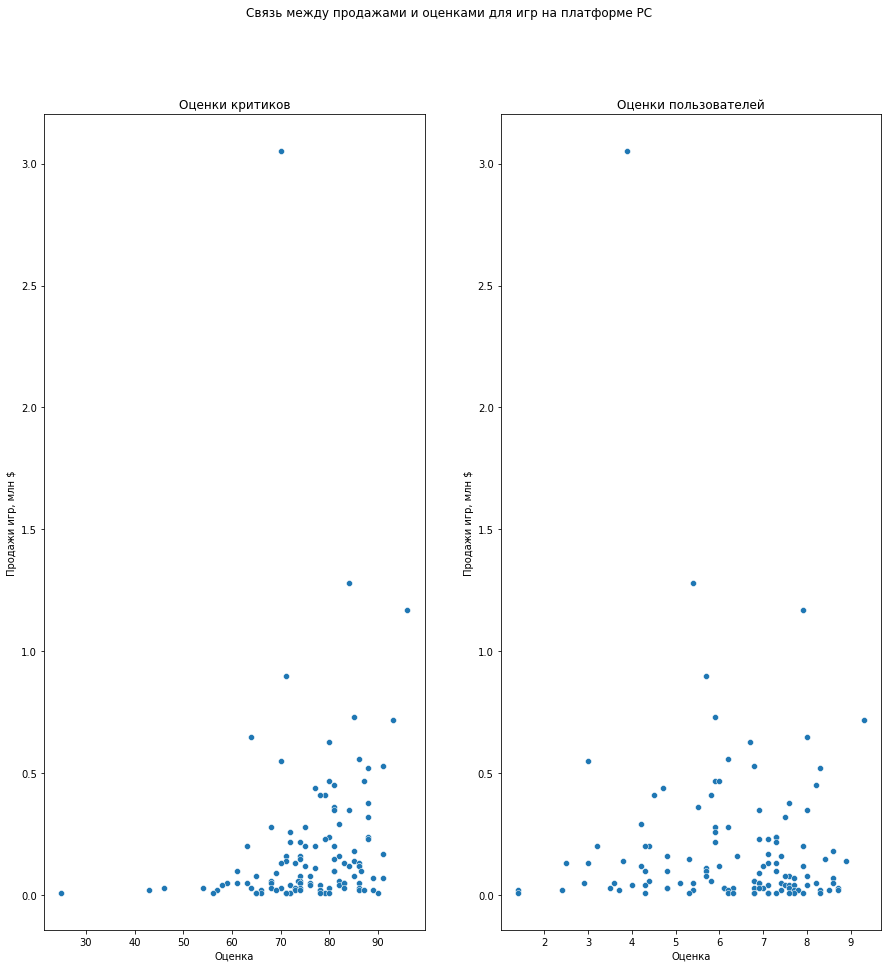

-0.07273846544993091

0.1766062003583756


In [51]:
data_x360 = actual_data.query('platform == "PC"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе PC')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

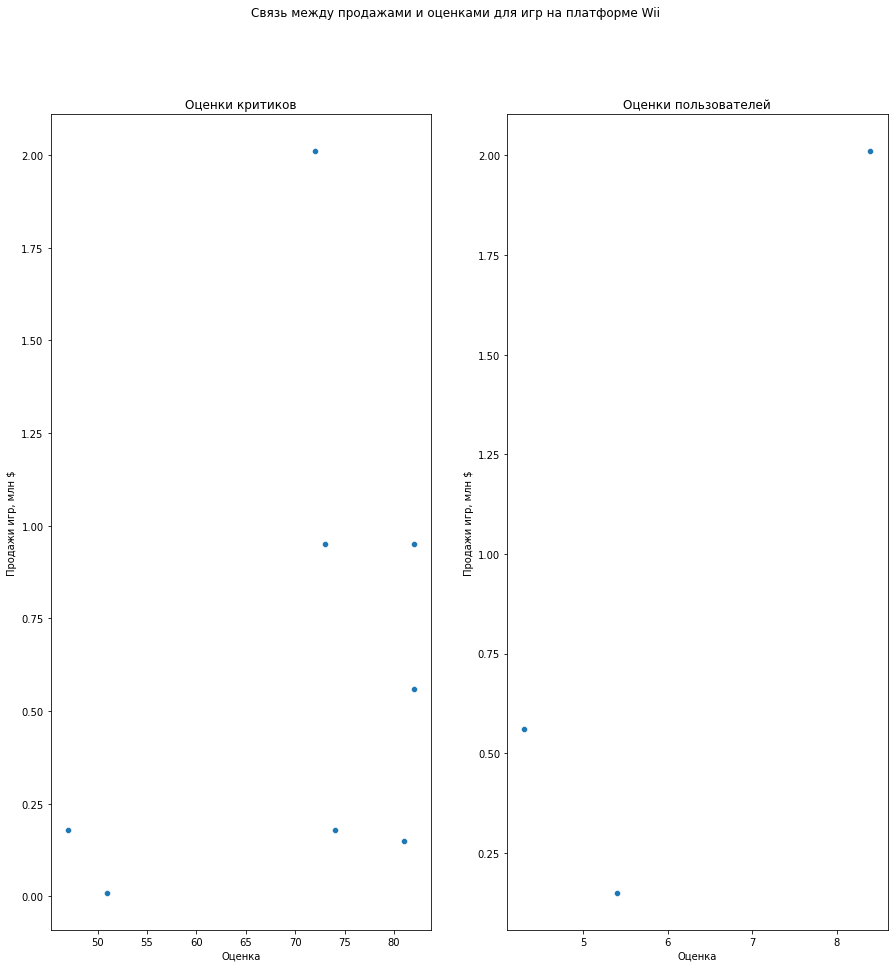

0.8899732570810119

0.33772992593133805


In [52]:
data_x360 = actual_data.query('platform == "Wii"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе Wii')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

Слишком мало данных, чтобы учитывать подобный результат

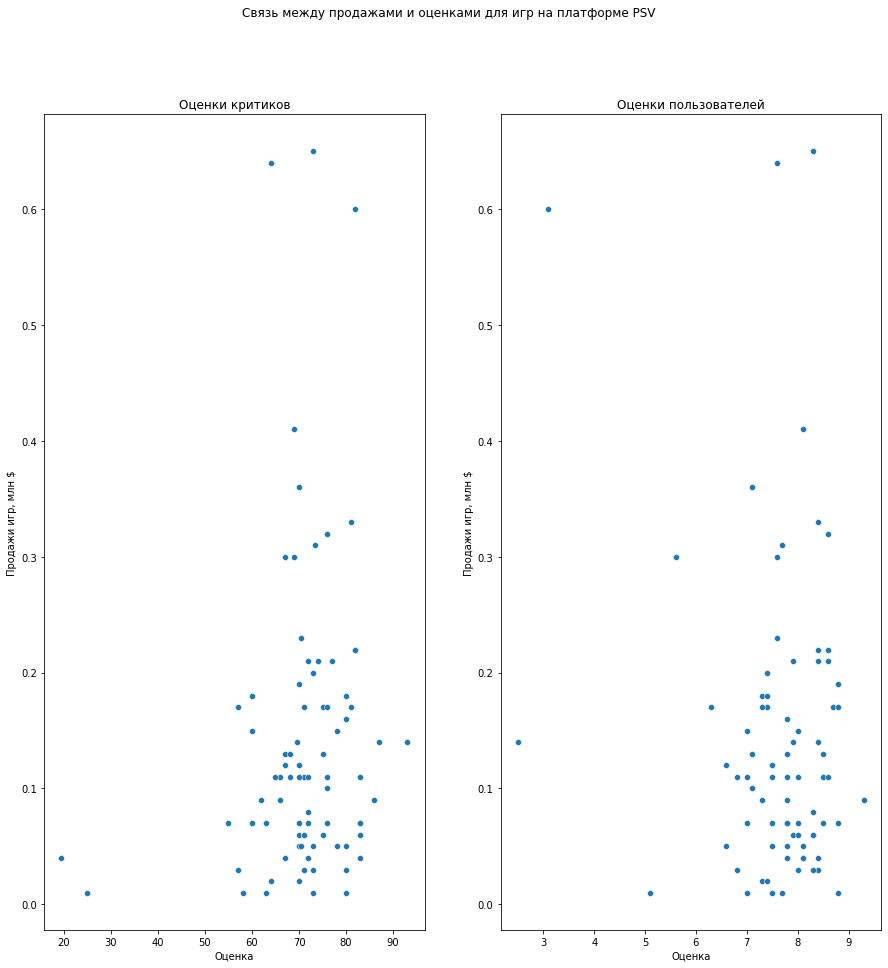

-0.1600243995825276

0.149763382543803


In [53]:
data_x360 = actual_data.query('platform == "PSV"')
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

sns.scatterplot(y='sum_sales', x='critic_score', data=data_x360, ax=axs[0])
sns.scatterplot(y='sum_sales', x='user_score', data=data_x360, ax=axs[1])

fig.suptitle('Связь между продажами и оценками для игр на платформе PSV')

axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи игр, млн $')
axs[0].set_title('Оценки критиков')

axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Оценки пользователей')

plt.show()

print(data_x360['sum_sales'].corr(data_x360['user_score']))
print(data_x360['sum_sales'].corr(data_x360['critic_score']))

Здесь тоже оценки пользователей имеют большее влияние.

### Проанализируем распределение игр по жанрам

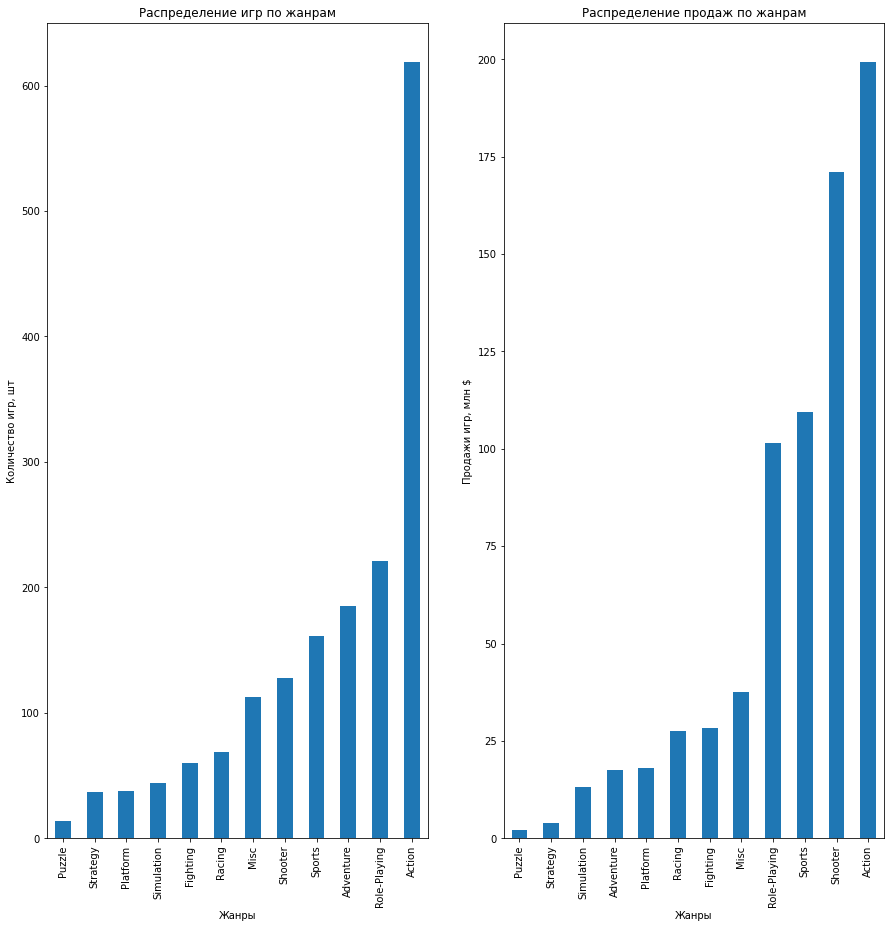

In [54]:
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15,15)
)

actual_data.groupby('genre')['name'].count().sort_values().plot.bar(ax=axs[0])
actual_data.groupby('genre')['sum_sales'].sum().sort_values().plot.bar(ax=axs[1])

axs[0].set_xlabel('Жанры')
axs[0].set_ylabel('Количество игр, шт')
axs[0].set_title('Распределение игр по жанрам')

axs[1].set_xlabel('Жанры')
axs[1].set_ylabel('Продажи игр, млн $')
axs[1].set_title('Распределение продаж по жанрам')
plt.show()

Можем сделать вывод, что самыми прибыльными являются жанры Action и Shooter, которые явно выделяются реди остальных жанров, более эе того жанр Shooter имеет и не столь большое количество копий для такой суммы продаж.

### Вывод

#### Важны ли данные за все периоды?

Для анализа взяты только последние 3 года, чтобы понимать настоящий тренд. Нам не столь важно количество игр выпущенных в 1980.

#### За какой характерный срок появляются новые и исчезают старые платформы?

Общий срок жизни платформ обычно более 6 лет, однако на пике они находятся в среднем не более трех лет.

#### Какие платформы лидируют по продажам, растут или падают? 

Можем отметить внушительную популярность платформы PS4, которая однака к 2016 году ощутима спадает, однако все же остается наиболее привелкательной для новой игры. Также на спад идет и платформа XOne, пиковое значение которой, судя по всему было в 2015, но стоит учесть, что это втора по популярности платформа. Также сразу замечаем видимое падение платформы 3DS, на которой уже явно не стоит выпускать игру.

#### Корреляция между отзывами и продажами

Посчитав корреляцию делаем вывод, что отзывы критиков в большинстве случаев намного больше влияют на продажи, чем отзывы пользователей. Однако все же есть явная зависимость от платформы.

#### Что можно сказать о самых прибыльных жанрах?

Cамыми прибыльными являются жанры Action и Shooter. Также стоит отметить, что жанр Shooter при этом имеет намного меньшее количество игр.

## Портрет пользователя для каждого региона

### Топ-5 популярных платформ

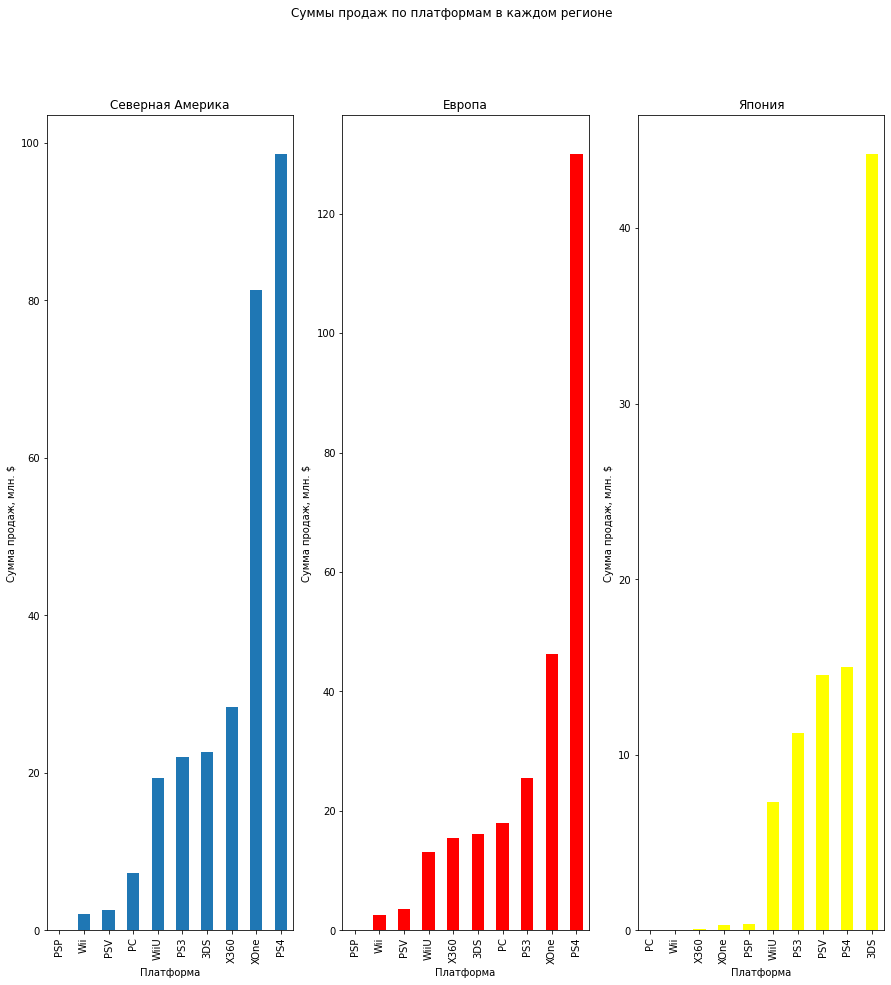

In [55]:
fig, axs = plt.subplots(
    nrows=1, ncols=3,
    figsize=(15,15)
)

actual_data.groupby('platform')['na_sales'].sum().sort_values().plot.bar(ax=axs[0])
actual_data.groupby('platform')['eu_sales'].sum().sort_values().plot.bar(ax=axs[1], color='red')
actual_data.groupby('platform')['jp_sales'].sum().sort_values().plot.bar(ax=axs[2], color='yellow')

fig.suptitle('Суммы продаж по платформам в каждом регионе')

axs[0].set_xlabel('Платформа')
axs[0].set_ylabel('Сумма продаж, млн. $')
axs[0].set_title('Северная Америка')

axs[1].set_xlabel('Платформа')
axs[1].set_ylabel('Сумма продаж, млн. $')
axs[1].set_title('Европа')

axs[2].set_xlabel('Платформа')
axs[2].set_ylabel('Сумма продаж, млн. $')
axs[2].set_title('Япония')

plt.show()

Видим, что топ-5 платформ в Северной Америке - PS4, XOne, X360, 3DS, PS3; в Европе - PS4, XOne, PS3, PC, 3DS; в Японии - 3DS, PS4, PSV, PS3, WiiU.

### Топ-5 популярных жанров

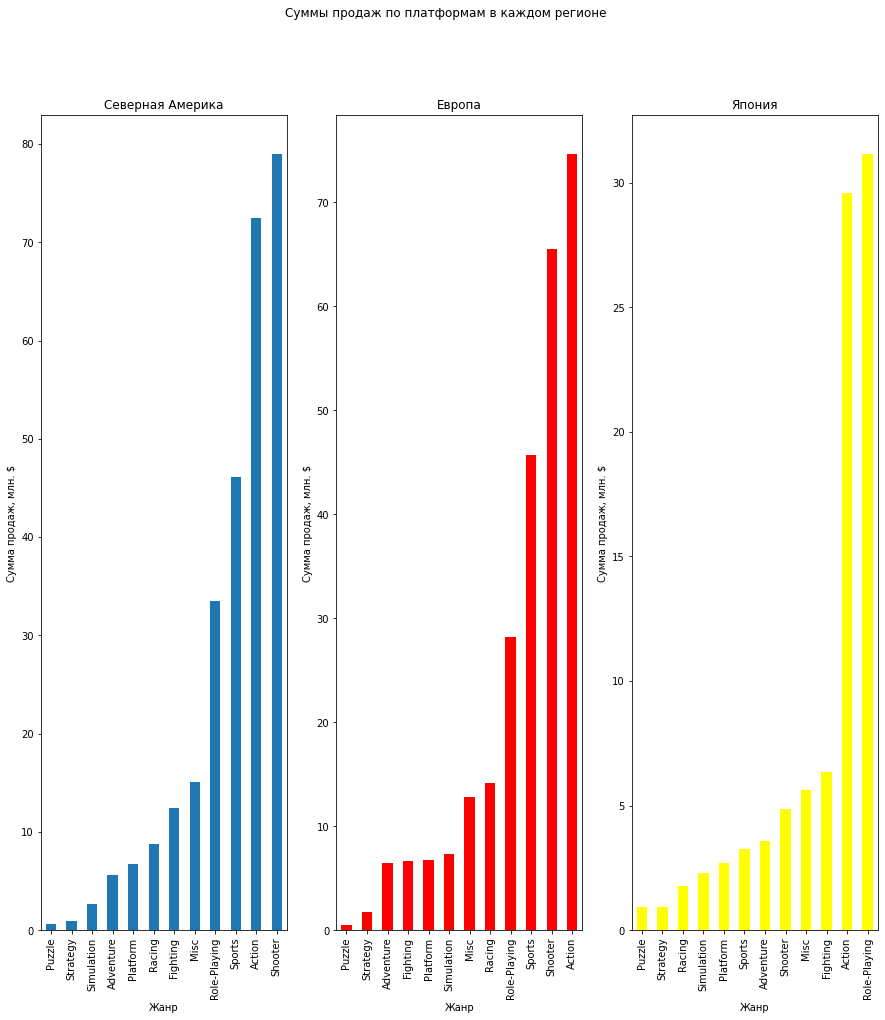

In [56]:
fig, axs = plt.subplots(
    nrows=1, ncols=3,
    figsize=(15,15)
)

actual_data.groupby('genre')['na_sales'].sum().sort_values().plot.bar(ax=axs[0])
actual_data.groupby('genre')['eu_sales'].sum().sort_values().plot.bar(ax=axs[1], color='red')
actual_data.groupby('genre')['jp_sales'].sum().sort_values().plot.bar(ax=axs[2], color='yellow')

fig.suptitle('Суммы продаж по платформам в каждом регионе')

axs[0].set_xlabel('Жанр')
axs[0].set_ylabel('Сумма продаж, млн. $')
axs[0].set_title('Северная Америка')

axs[1].set_xlabel('Жанр')
axs[1].set_ylabel('Сумма продаж, млн. $')
axs[1].set_title('Европа')

axs[2].set_xlabel('Жанр')
axs[2].set_ylabel('Сумма продаж, млн. $')
axs[2].set_title('Япония')

plt.show()

Видим, что топ-5 жанров в Северной Америке - Shooter, Action, Sports, Role-Playing, Misc; в Европе - Action, Shooter, Sports, Role-Playing, Racing; в Японии - Role-Playing, Action, Fighting, Misc, Shooter.

### Влияние рейтинга ESRB на продажи

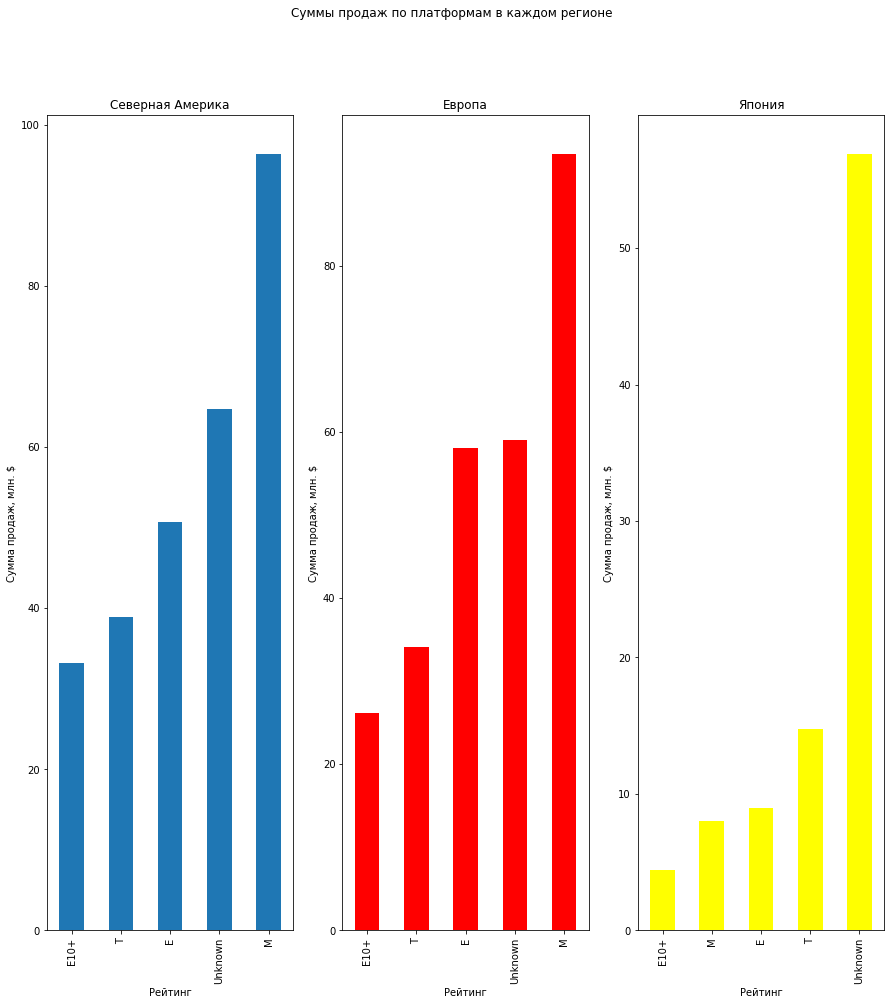

In [57]:
fig, axs = plt.subplots(
    nrows=1, ncols=3,
    figsize=(15,15)
)

actual_data.groupby('rating')['na_sales'].sum().sort_values().plot.bar(ax=axs[0])
actual_data.groupby('rating')['eu_sales'].sum().sort_values().plot.bar(ax=axs[1], color='red')
actual_data.groupby('rating')['jp_sales'].sum().sort_values().plot.bar(ax=axs[2], color='yellow')

fig.suptitle('Суммы продаж по платформам в каждом регионе')

axs[0].set_xlabel('Рейтинг')
axs[0].set_ylabel('Сумма продаж, млн. $')
axs[0].set_title('Северная Америка')

axs[1].set_xlabel('Рейтинг')
axs[1].set_ylabel('Сумма продаж, млн. $')
axs[1].set_title('Европа')

axs[2].set_xlabel('Рейтинг')
axs[2].set_ylabel('Сумма продаж, млн. $')
axs[2].set_title('Япония')

plt.show()

Видим, что рейтинг имеет влияение на продажи, особенно это заметно, если взглянуть на разницу между Японией и остальными регионами.

### Вывод

#### Топ-5 популярных платформ по регоинам

Северная Америка:
1 - PS4
2 - XOne
3 - X360
4 - 3DS
5 - PS3

Европа:
1 - PS4
2 - XOne
3 - PS3
4 - PC
5 - 3DS

Япония:
1 - 3DS
2 - PS4
3 - PSV
4 - PS3
5 - WiiU

#### Топ-5 популярных жанров по регионам

Северная Америка:
1 - Shooter
2 - Action
3 - Sports
4 - Role-Playing
5 - Misc

Европа:
1 - Action
2 - Shooter
3 - Sports
4 - Role-Playing
5 - Racing

Япония:
1 - Role-Playing
2 - Action
3 - Fighting
4 - Misc
5 - Shooter

#### Влияние рейтинга ESRB

Исходя из поулченных данных мы видим явное влияние рейтинга, однако же у нас есть часть отсутствующих данных.

## Проверка гипотез

### Зададим пороговое значение alpha

In [58]:
alpha = .05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую и альтернативную гипотезы:
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [59]:
xbox_pc_data = actual_data.query('platform == "XOne" or platform == "PC"')

xbox_data = xbox_pc_data.query('platform == "XOne"')['user_score'].dropna()
pc_data = xbox_pc_data.query('platform == "PC"')['user_score'].dropna()



results = st.ttest_ind(xbox_data, pc_data, equal_var = False)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(results.pvalue)

Отвергаем нулевую гипотезу

0.04447276447485861


Отвергаем нулевую гипотезу и делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC разные

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевую и альтернативную гипотезы:
H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [60]:
action_sport_data = actual_data.query('genre == "Action" or genre == "Sports"')

action_data = action_sport_data.query('genre == "Action"')['user_score'].dropna()
sport_data = action_sport_data.query('genre == "Sports"')['user_score'].dropna()



results = st.ttest_ind(action_data, sport_data, equal_var = False)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(results.pvalue)

Отвергаем нулевую гипотезу

2.319573586959837e-16


Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и соответственно приняли, что они разные. А также отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

В данной работе был проведен анализ исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В начале была выполнена предобработка данных, в ходе которой:
- Были приведены названия столбцов к нижнему регистру.
- Были заполнены пропуски в столбцах name, year_of_release
- Были отброшены строки с отсутствующими значениями в столбце genre
- Был добавлен столбец sum_sales
- Были частично обработаны значения в столбцах user_score, critic_score, rating

Далее был проведен исследовательский анализ, в ходе которого были закреплены следующие утверждения:
- Для анализа взяты только последние 3 года, чтобы понимать настоящий тренд. Нам не столь важно количество игр выпущенных в 1980.
- Общий срок жизни платформ обычно более 6 лет, однако на пике они находятся в среднем не более трех лет.
- Для нашей задачи исходя из полученных результатов мы видим, что PS4 имет нисходящий тренд, однако является намного более перспективной платформой по сравнению с XOne и 3DS, которые также относительно популярны.
- Посчитав корреляцию делаем вывод, что в большинстве случаев отзывы критиков влияют больше, однако же есть платформы (например, PC), где отзывы пользователей намного важнее.
- Cамыми прибыльными являются жанры Action и Shooter. Также стоит отметить, что жанр Shooter при этом имеет намного меньшее количество игр.

Далее были составлены портреты пользователей каждого региона:

Топ-5 популярных платформ: 

    Северная Америка:
    1 - PS4
    2 - XOne
    3 - X360
    4 - 3DS
    5 - PS3

    Европа:
    1 - PS4
    2 - XOne
    3 - PS3
    4 - PC
    5 - 3DS

    Япония:
    1 - 3DS
    2 - PS4
    3 - PSV
    4 - PS3
    5 - WiiU
    
Топ-5 популярных жанров:

    Северная Америка:
    1 - Shooter
    2 - Action
    3 - Sports
    4 - Role-Playing
    5 - Misc

    Европа:
    1 - Action
    2 - Shooter
    3 - Sports
    4 - Role-Playing
    5 - Racing

    Япония:
    1 - Role-Playing
    2 - Action
    3 - Fighting
    4 - Misc
    5 - Shooter
    
Влияние рейтинга ESRB:
Исходя из поулченных данных мы видим явное влияние рейтинга, однако же у нас есть часть отсутствующих данных.

В завершении были проверены гипотезы:
Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и соответственно приняли, что они разные. А также отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.